<a href="https://colab.research.google.com/github/cmunozcortes/cs249/blob/main/colab/lab_4_prediction_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Due Date: Monday, November 16nd, 11:59pm**

- Save a copy of the notebook to your Google Drive. You can do that by going to the menu and clicking `File` > `Save` > `SAVE A COPY IN DRIVE`.
- Fill out the missing parts and run the code modules.
- Answer the questions (if any) in a separate document or by adding a new `Text` block inside the Colab.
- Download the solved notebook by going to the menu and clicking `File` > `Download .ipynb`.
- Make sure the downloaded version is showing your solutions.
- Upload your solutions to CCLE (under "Colab Assignment #4: Prediction - Regression" for Week 6).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

Download the data for house prices.

In [2]:
!wget -O house_prices.csv https://www.dropbox.com/s/v14nl9kcgqoqn36/house_prices.csv?dl=0

--2020-11-15 14:26:39--  https://www.dropbox.com/s/v14nl9kcgqoqn36/house_prices.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/v14nl9kcgqoqn36/house_prices.csv [following]
--2020-11-15 14:26:40--  https://www.dropbox.com/s/raw/v14nl9kcgqoqn36/house_prices.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc88ffbd045bbbca3ec2a000d78a.dl.dropboxusercontent.com/cd/0/inline/BDMvHX_EhnhWHCVSmyYu9CdGMZT3WPIU_3UNT0Bay46m5FsFXb6NP-ncr8lIOLrlks7kNPQqwHXEDspnSfHlfbJ8Hb94_n5iHfkT__R94jXGKwGBfsjeV-ojf7Jz9mhFSQA/file# [following]
--2020-11-15 14:26:40--  https://uc88ffbd045bbbca3ec2a000d78a.dl.dropboxusercontent.com/cd/0/inline/BDMvHX_EhnhWHCVSmyYu9CdGMZT3WPIU_3UNT0Bay46m5FsFXb6NP-ncr8lIOLrlks7kNPQqwHXEDspnSfHlfbJ8Hb94_n5iH

Load the data.

In [3]:
prices_data = pd.read_csv("house_prices.csv")
prices_data = prices_data.drop("house_type", axis = 1)

print("The first three rows of the data are:")
prices_data.head(3)

The first three rows of the data are:


,sqft,age,price
0,1380.0,1.873884,231430.0
1,2137.0,0.655100,276776.0
2,1639.0,22.591568,199513.0


Add a number of additional features to the dataset.

In [4]:
prices_data = prices_data.assign(
    age_sqr = prices_data.age**2,
    age_cub = prices_data.age**3,
    age_log = np.log(prices_data.age),
    age_sqrt = np.sqrt(prices_data.age),
    sqft_sqr = prices_data.sqft**2,
    sqft_cub = prices_data.sqft**3,
    sqft_log = np.log(prices_data.sqft),
    sqft_sqrt = np.sqrt(prices_data.sqft),    
    sqft_x_age = prices_data.sqft * prices_data.age
)

print("The first three rows of the updated dataset are:")
prices_data.head(3)

The first three rows of the updated dataset are:


,sqft,age,price,age_sqr,age_cub,age_log,age_sqrt,sqft_sqr,sqft_cub,sqft_log,sqft_sqrt,sqft_x_age
0,1380.0,1.873884,231430.0,3.511440,6.580029,0.628013,1.368899,1904400.0,2.628072e+09,7.229839,37.148351,2585.959380
1,2137.0,0.655100,276776.0,0.429156,0.281140,-0.422967,0.809383,4566769.0,9.759185e+09,7.667158,46.227697,1399.949311
2,1639.0,22.591568,199513.0,510.378927,11530.260041,3.117577,4.753059,2686321.0,4.402880e+09,7.401842,40.484565,37027.579316


Separate features and labels into two different variables.

In [5]:
X = prices_data.drop("price", axis=1)
y = prices_data.price

Divide the data into train/test datasets using a 70/30 split.

In [6]:
from sklearn.model_selection import train_test_split

# TODO: Assign the right values to X_train, X_test, y_train and y_test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    shuffle=True,
    random_state=0
)
# END OF TODO

print("shape of X_train is: ", X_train.shape)
print("shape of X_test is: ", X_test.shape)

shape of X_train is:  (140, 11)
shape of X_test is:  (60, 11)


##Linear Regression for Prediction

Fit a linear regression model to the train data, and compute the RMSE of the fitted model in the training data and the test data.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# TODO: Compute rmse_train and rmse_test
# Fit a linear regression model to the data
model = LinearRegression()
model.fit(X_train, y_train)

# Find the predicted values for the train set and the test set
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
# END OF TODO

print("Train RMSE of the linear regression model is: ", rmse_train)
print("Test RMSE of the linear regression model is: ", rmse_test)

Train RMSE of the linear regression model is:  48371.83358226316
Test RMSE of the linear regression model is:  72942.53316921077


Based on the train and test RMSE's, do you see any overfitting in the model?

_Answer_: Yes, based on the difference between the train and test RMSE values, we can conclude that the model is overfitted and as such it does not generalize well.

##$k$-Nearest Neighbors

Fit a KNN model to the train data, and compute the RMSE of the fitted model in the training data and the test data. Use $k = 5$.

In [8]:
from sklearn.neighbors import KNeighborsRegressor

# Fit the model
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# Find the predicted values for the train and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# TODO: Compute rmse_train and rmse_test
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
# END OF TODO

print("Train RMSE of the KNN model is: ", rmse_train)
print("Test RMSE of the KNN regression model is: ", rmse_test)

Train RMSE of the KNN model is:  49904.32879909604
Test RMSE of the KNN regression model is:  62569.93190304216


Based on train and test RMSE's, do you see any overffiting in the model?

_Answer_: Yes, because the RMSE of the test data is still higher than the RMSE from the test data by a non-negligible margin. 

Between this model and the linear regression model in the previous part, which one do you choose for predicting house prices?

_Answer_: I choose the KNN model because even though it has a higher RMSE for the train data, it generalizes better based on the RMSE from the test data.

##Regularization

As we said in the lecture, regularization is one of the methods we can use to alleviate overfitting in our model.
Let's apply regularization to our linear regression model. For this part, we are going to use the L-2 regularized linear regression.

Note: Before applying regularization, we need to normalize the features in our data. As we said in the lecture, L-2 regularization introduces a new term into our objective function, $\lambda \sum \beta_i^2$. If one of the coefficients, $\beta_j$, is much larger compared to the other coefficients then the regularization term is primarily dominated by the value of that coefficient. Normalizing features helps us to avoid problems like that. We can achieve that by using `normalize=True` as the parameter in `Ridge`.

For different values of the regularization hyperparameter, fit a ridge regression to the train data, and compute the RMSE of the fitted model in the training data and the test data.

In [9]:
from sklearn.linear_model import Ridge

rmses_train = []
rmses_test = []
lambdas = np.logspace(-4, 3, 100)

for l in lambdas:
  # TODO: Compute rmse_train and rmse_test for ridge regression
  #       Use l as the regularization parameter
  model = Ridge(alpha=l, normalize=True)
  model.fit(X_train, y_train)
  rmse_train = mean_squared_error(y_train, model.predict(X_train), squared=False)
  rmse_test = mean_squared_error(y_test, model.predict(X_test), squared=False)
  # END OF TODO

  rmses_train.append(rmse_train)
  rmses_test.append(rmse_test)

Draw the train and test RMSE for different values of the regularization hyperparameter.

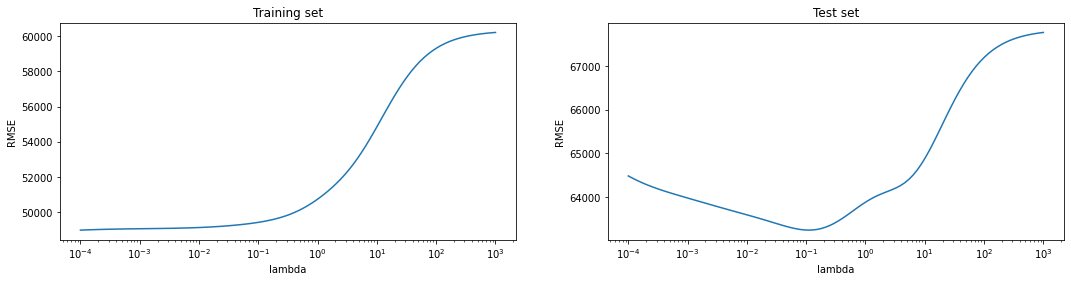

In [10]:
plt.figure(figsize=(18, 4))

plt.subplot(121)
ax = plt.gca()
ax.plot(lambdas, rmses_train)
ax.set_xscale("log")
plt.xlabel("lambda")
plt.ylabel("RMSE")
plt.title("Training set")
plt.axis("tight")

plt.subplot(122)
ax = plt.gca()
ax.plot(lambdas, rmses_test)
ax.set_xscale("log")
plt.xlabel("lambda")
plt.ylabel("RMSE")
plt.title("Test set")
plt.axis("tight")

plt.show()

- How does the test RMSE of the best ridge regression model compares to the linear regression model? What about the KNN model?
- Did regularization help with overfitting in the linear regression model?
- Based on error in train and test sets, does the best ridge regression model show any overfitting?
- Is the error of the best ridge regression model a good estimate for its generalization error?

In [11]:
# Find the test RMSE for the best Ridge regression model
min_rmse_test_ridge = np.min(rmses_test)
index_min_rsme_test_ridge = np.argmin(rmses_test)
best_lambda_test_ridge = lambdas[index_min_rsme_test_ridge]
print(f"Test RMSE for best Ridge regression model: {min_rmse_test_ridge}")
print(f"Lambda for best Ridge regression model: {best_lambda_test_ridge}")

Test RMSE for best Ridge regression model: 63251.23444244322
Lambda for best Ridge regression model: 0.10974987654930557


In [12]:
# Find the train RMSE for the best Ridge regression model
print(f"Train RMSE for best Ridge regression model: {rmses_train[index_min_rsme_test_ridge]}")

Train RMSE for best Ridge regression model: 49448.3515048999


#### Answers

*   Based the RMSE, the best ridge regression model performed better on the test set that the linear regression model without regularization, but not better than the KNN model
*   Regularization did help with overfitting in the linear regression model, as it decreased the RMSE on the test set
*   Based on the fact that the test error is still considerably higher than the train error, we can conclude that the model is still overfitting the data, although to a lesser extent than without regularization
*   No, it's not. The estimated error is typically biased downward, therefore it underestimates the generalization error of the chosen model.

